In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from src.compile_results import compile_results

In [13]:
df = pd.read_csv("response_evaluation/math_rewritten_temp.csv", index_col=0)

In [14]:
print(df)

       Correctly rewritten?  DSReason+basicprompt BEFORE  \
Total                  24.0                           15   
NaN                     1.0                            0   
NaN                     1.0                            1   
NaN                     1.0                            1   
NaN                     1.0                            0   
NaN                     0.0                            0   
NaN                     1.0                            1   
NaN                     1.0                            1   
NaN                     1.0                            1   
NaN                     1.0                            0   
NaN                     1.0                            1   
NaN                     1.0                            0   
NaN                     1.0                            1   
NaN                     1.0                            1   
NaN                     1.0                            0   
NaN                     0.0             

{'Before Rewriting': (7, 15, 17), 'After Rewriting': (10, 19, 22)}


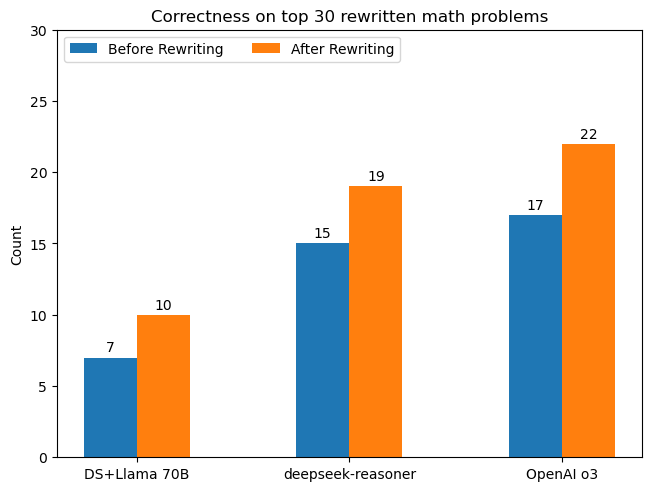

In [61]:



# 2. Pull out the totals
totals = df.loc['Total']

# 3. Extract the four groups
correctly = totals['Correctly rewritten?']

qwen_before = totals['Qwen70+basicprompt BEFORE']
qwen_after  = totals['Qwen70+basicprompt AFTER']

dsr_before  = totals['DSReason+basicprompt BEFORE']
dsr_after   = totals['DSReason+basicprompt AFTER']

o3_before   = totals['GPT-o3+basicprompt BEFORE']
o3_after    = totals['GPT-o3+basicprompt AFTER']

species = ("DS+Llama 70B", "deepseek-reasoner", "OpenAI o3")
penguin_means = {
    'Before Rewriting': (int(qwen_before), int(dsr_before), int(o3_before)),
    'After Rewriting': (int(qwen_after), int(dsr_after), int(o3_after)),

}
print(penguin_means)

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Correctness on top 30 rewritten math problems')
ax.set_xticks(x + width / 2, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 30)

plt.show()


In [40]:
qwen_before = totals['Qwen70+basicprompt BEFORE']
qwen_after  = totals['Qwen70+basicprompt AFTER']

dsr_before  = totals['DSReason+basicprompt BEFORE']
dsr_after   = totals['DSReason+basicprompt AFTER']

o3_before   = totals['GPT-o3+basicprompt BEFORE']
o3_after    = totals['GPT-o3+basicprompt AFTER']

qwen_same = 0
qwen_more = 0 
qwen_less = 0

dsr_same = 0
dsr_more = 0 
dsr_less = 0

o3_same = 0
o3_more = 0 
o3_less = 0
df = df.fillna(0)
df = df.replace(' ', 0)
for index, row in df.iterrows():
    if index == 'Total':
        continue
 
    if int(row['Qwen70+basicprompt BEFORE']) == int(row['Qwen70+basicprompt AFTER']):
        qwen_same +=1
    elif int(row['Qwen70+basicprompt BEFORE']) < int(row['Qwen70+basicprompt AFTER']):
        qwen_more +=1
    else:
        qwen_less +=1
    
    if int(row['DSReason+basicprompt BEFORE']) == int(row['DSReason+basicprompt AFTER']):
        dsr_same +=1
    elif int(row['DSReason+basicprompt BEFORE']) < int(row['DSReason+basicprompt AFTER']):
        dsr_more +=1
    else:
        dsr_less +=1

    if int(row['GPT-o3+basicprompt BEFORE']) == int(row['GPT-o3+basicprompt AFTER']):
        o3_same +=1
    elif int(row['GPT-o3+basicprompt BEFORE']) < int(row['GPT-o3+basicprompt AFTER']):
        o3_more +=1
    else:
        o3_less +=1


        

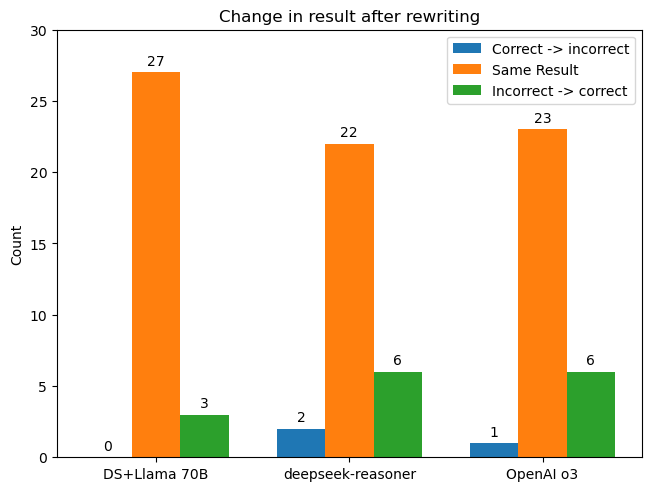

In [60]:
species = ("DS+Llama 70B", "deepseek-reasoner", "OpenAI o3")
penguin_means = {
    'Correct -> incorrect': (int(qwen_less), int(dsr_less), int(o3_less)),
    'Same Result': (int(qwen_same), int(dsr_same), int(o3_same)),
    'Incorrect -> correct': (int(qwen_more), int(dsr_more), int(o3_more))

}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Change in result after rewriting')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 30)

plt.show()